**Nombre: German Mauricio Otálvaro Quiroga**

In [105]:
#Librerias de clustering
from   sklearn.cluster           import KMeans
from   sklearn.metrics           import silhouette_score
from   sklearn.metrics           import pairwise_distances_argmin_min
import sklearn.model_selection   as ms;
#libreria de graficos en tercera dimensión
from   mpl_toolkits.mplot3d import Axes3D
#Librerias básicas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy   as np
#Se establece el tamaño de los graficos
sns.set(rc={'figure.figsize':(16,10)})
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('ggplot')

In [197]:
#Load del dataset BuddyMove
info = pd.read_csv('Wholesale customers data.csv', delimiter=',', decimal='.');    
data = pd.DataFrame(info);

In [200]:
#Se muestran las primeras 10 filas del dataset
print(data.head(10));

Descripción del dataset: 

           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.2500

**1. Describa el dataset (El proceso descrito en los datos y cada uno de los campos).**

**CREADOR**:
Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisboa, Portugal

**INFO**:

Proporciona toda la información relevante sobre su conjunto de datos de clientes al por mayor.

**ATRIBUTOS**:

1. FRESH: gasto anual (mu) en productos frescos (Continuo); 
2. MILK: gasto anual (mu) en productos lácteos (Continuo);  
3. GROCERY:gasto anual (mu) en productos comestibles (Continuo);  
4. FROZEN: gasto anual (mu) en productos congelados (Continuo);
5. DETERGENTS_PAPER: gasto anual (mu) en detergentes y productos de papel (Continuo);
6. DELICATESSEN: gasto anual (mu) en productos delicatessen (Continuo);
7. CHANNEL: Canal de clientes - Horeca (Hotel / Restaurante / Cafetería) o Canal minorista (Nominal);
8. REGION:  Región de los clientes - Lisboa, Oporto u Otro (Nominal);

REGION	Frequency: 
Lisboa	77 
Oporto	47 
Other Region	316 
Total	440 

CHANNEL	Frequency 
Horeca	298 
Retail	142 
Total	440 

In [262]:
#Mostramos la cantidad de elementos agrupados por la Region
print( data.groupby('Region').size() )

Region
1     77
2     47
3    316
dtype: int64


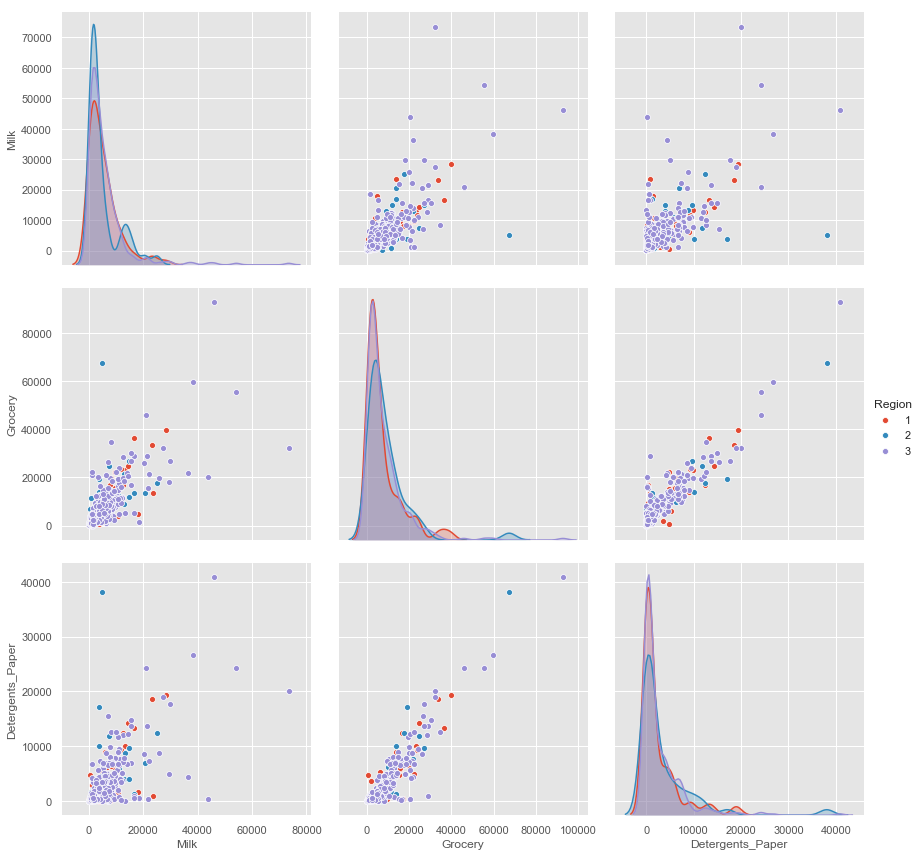

In [259]:
#Se muestra la relacion de datos mediante un diagrama de dispersion 
sns.pairplot( data.dropna(), hue='Region', height=4,vars=["Milk","Grocery","Detergents_Paper"], kind='scatter')

In [220]:
#Data para X usando religion, naturaleza y teatros
X =  np.array( data.iloc[:,[3,4,6]] )
#Data para Y se usa la categoria de los deportes
Y =  np.array( data.iloc[:,1] )

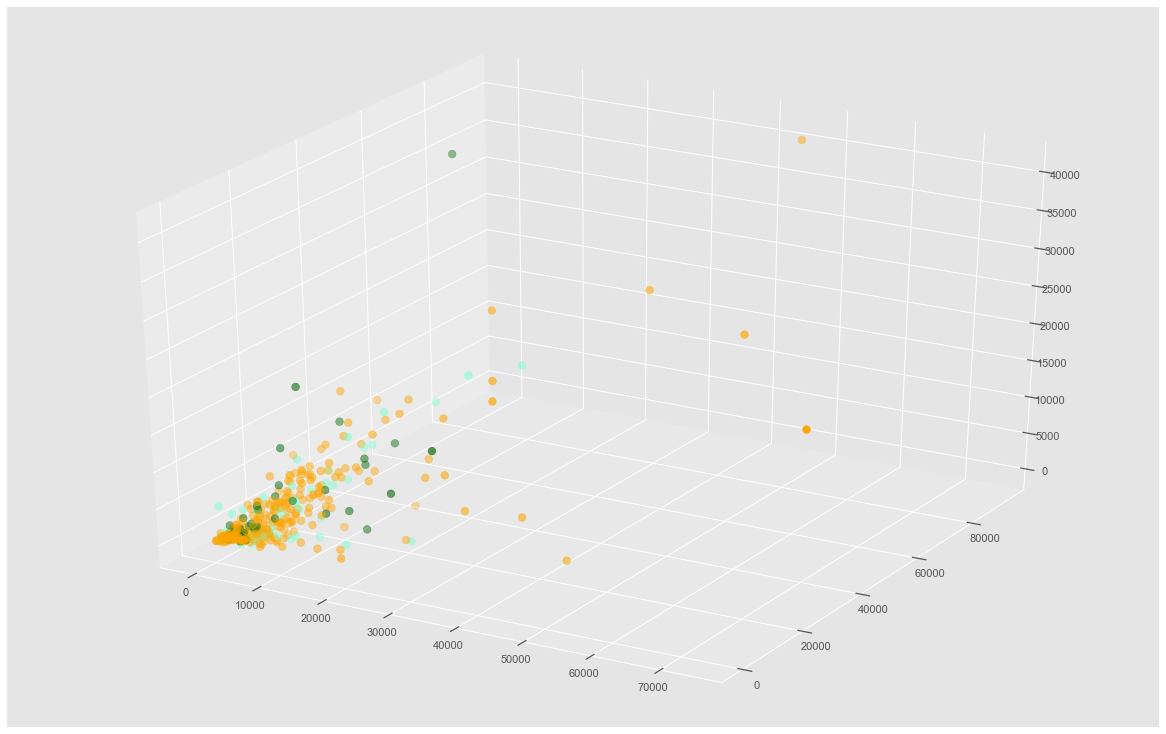

In [236]:
fig = plt.figure()
#la figura se convierte en un plano de tres dimensiones
tresDim = Axes3D( fig )
#SE CREA UN ARREGLO DE COLORES QUE SERAN USADOS PARA PINTAR LOS ELEMENTOS ASOCIADOS A UN CENTROIDE DETERMINADO
colors=['#00FFFF','#7FFFD4','#006400','orange']
colorAsignado=[];
for row in Y:
    colorAsignado.append( colors[row] );
#SE CREA LA GRAFICA 3D
tresDim.scatter( X[:, 0], X[:, 1], X[:, 2], c=colorAsignado, s=60)

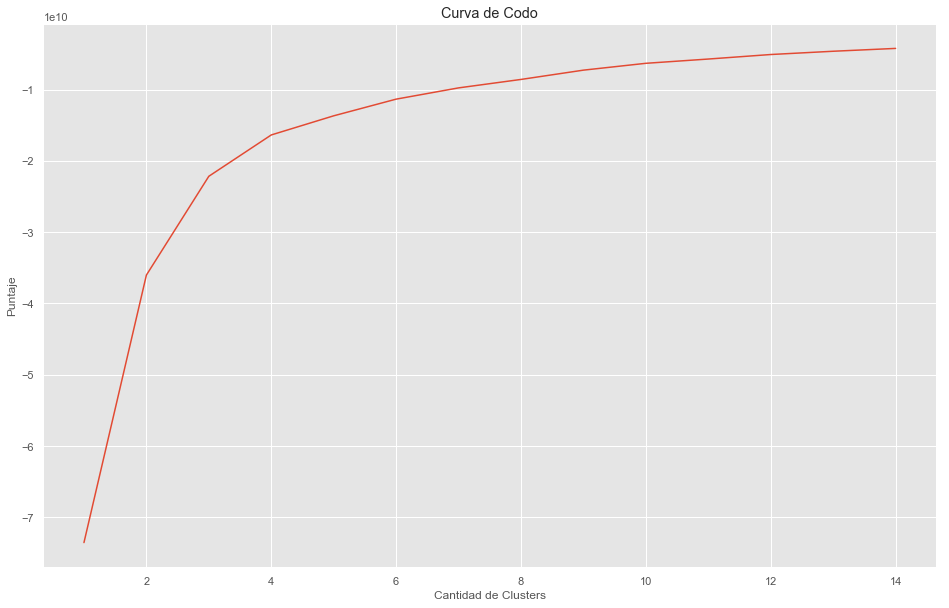

In [222]:
#Se genera un rango de 15 posibilidades para buscar el valor de K
Rango = range(1, 15);
#Buscamos los centroides
kmeans = [ KMeans(n_clusters=i) for i in Rango];
puntaje = [ kmeans[i].fit(X).score(X) for i in range( len(kmeans) )];
#Dibujamos la curva de codo y verificamos visualmente el posible valor de K
plt.plot( Rango, puntaje );
plt.xlabel('Cantidad de Clusters');
plt.ylabel('Puntaje');
plt.title('Curva de Codo');
plt.show();

**2. Entrene un modelo de clustering utilizano k-means y variando la proporción usada para entrenar y evaluar el modelo. Debe justificarse la escogencia de los parámetros usados para entrenar el modelo.**

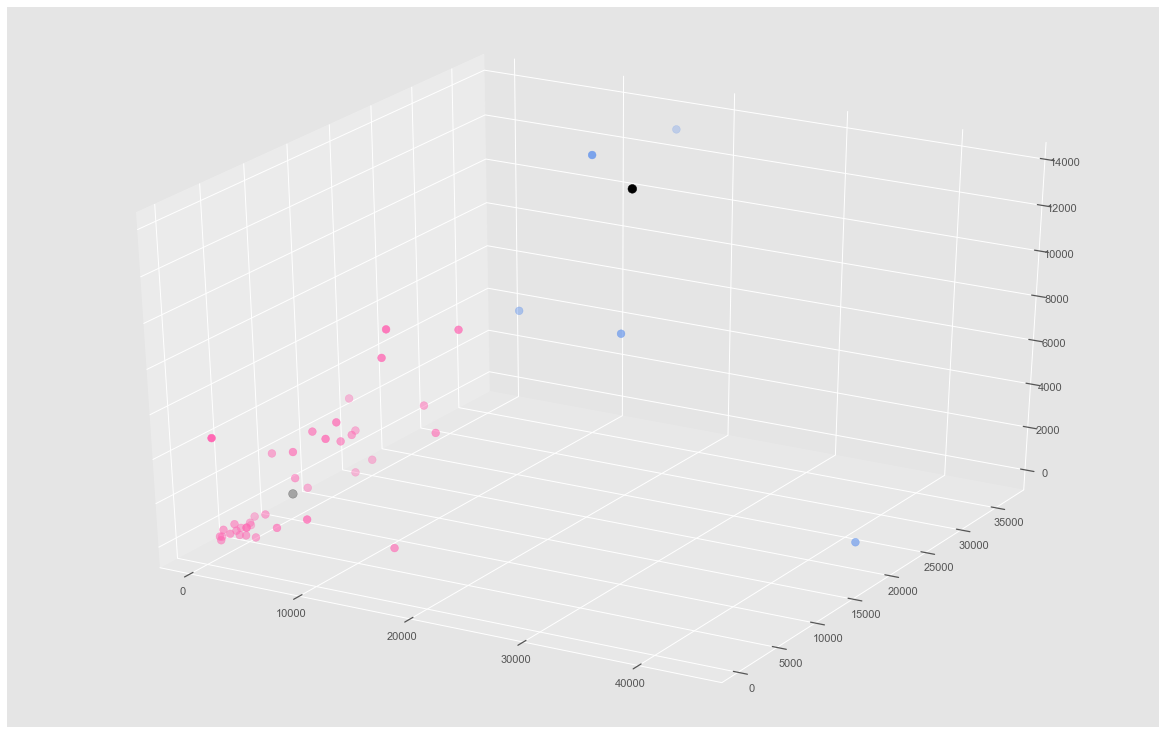

In [250]:
#Entrenamos el primer modelo con un 10% de datos para pruebas
X_train1, X_test1 = ms.train_test_split(X, test_size = 0.1);
#Se entrena el modelo
kmeans = KMeans(n_clusters=2).fit(X_train1);
centroids = kmeans.cluster_centers_;
#Predecimos los clusters
labels1 = kmeans.predict(X_test1);
#Asignamos los nuevos centroides
C = kmeans.cluster_centers_;
#Asignamos los colores para cada cluster
colors=['#6495ED','#ff69b4','blue']
colorAsignado=[];
for row in labels1:
    colorAsignado.append( colors[row] );
#Graficamos ne la figura
fig = plt.figure();
#la figura se convierte en un plano de tres dimensiones
ax = Axes3D(fig)
#los centroides se dibujan con un circulo de color negro
ax.scatter(X_test1[:, 0], X_test1[:, 1], X_test1[:, 2], c=colorAsignado, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='.', c='black', s=300)

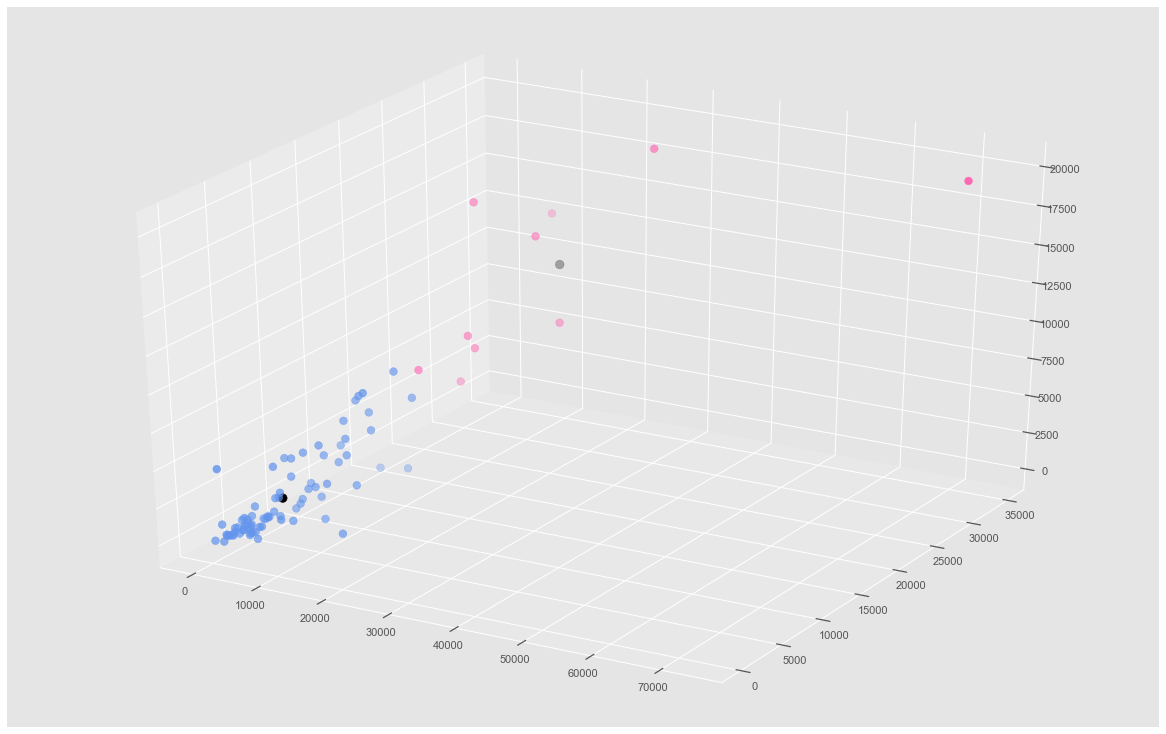

In [252]:
#Entrenamos el segundo modelo con un 20% de datos para pruebas
X_train2, X_test2 = ms.train_test_split(X, test_size = 0.2);
#Se entrena el modelo
kmeans = KMeans(n_clusters=2).fit(X_train2);
centroids = kmeans.cluster_centers_;
#Predecimos los clusters
labels2 = kmeans.predict(X_test2);
#Asignamos los nuevos centroides
C2 = kmeans.cluster_centers_;
#Asignamos los colores para cada cluster
colors=['#6495ED','#ff69b4', 'blue']
colorAsignado=[];
for row in labels2:
    colorAsignado.append( colors[row] );
#Graficamos ne la figura
fig = plt.figure();
#la figura se convierte en un plano de tres dimensiones
ax = Axes3D(fig)
#los centroides se dibujan con un circulo de color negro
ax.scatter(X_test2[:, 0], X_test2[:, 1], X_test2[:, 2], c=colorAsignado, s=60)
ax.scatter(C2[:, 0], C2[:, 1], C2[:, 2], marker='.', c='black', s=300)

In [260]:
#3. Evalúe la efectividad de cada uno de los modelos.

#Se muestra la efectividad aproximada del modelo mediante el uso del coeficiente de silueta que relaciona los datos con un modelo de grupos bien definidos
modelEfec1 = silhouette_score(X_test1, labels1, metric='euclidean');
modelEfec2 = silhouette_score(X_test2, labels2, metric='euclidean');

print("\nEfectividad con 10% de verificación: " + str( modelEfec1 ) );
print("Efectividad  con 20% de verificación: "  + str( modelEfec2 ) );


Efectividad con 10% de verificación: 0.6922692851341213
Efectividad  con 20% de verificación: 0.7033641700240639


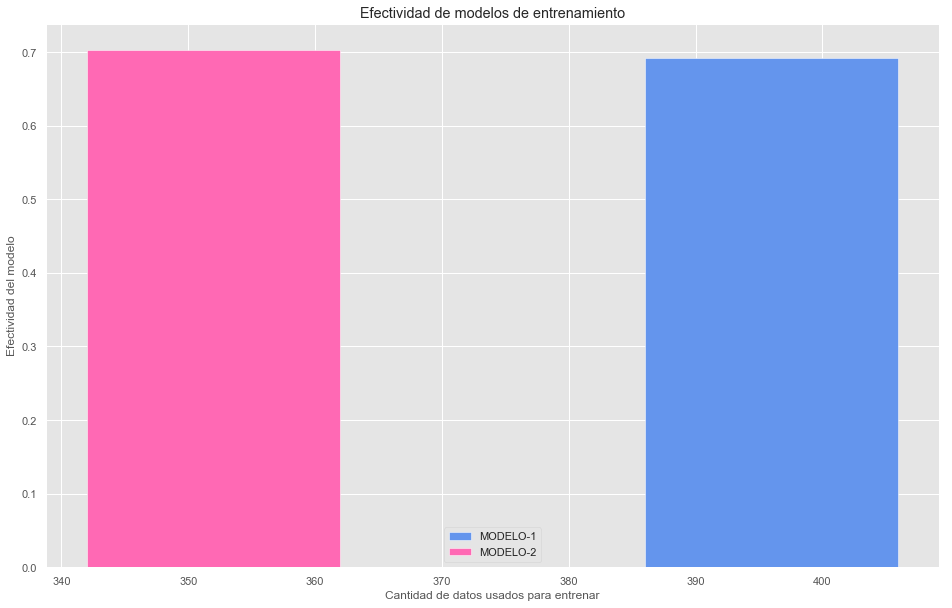

In [261]:
#4. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad del modelo. Describa sus hallazgos.

#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = X.shape[0] - (X.shape[0]*10)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = X.shape[0] - (X.shape[0]*20)/100;

#Dibujamos el grafico
plt.bar(cantidadDatos1erModelo, efectividadModelo1, facecolor='#6495ED', edgecolor='white',width=20,label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, efectividadModelo2, facecolor='#ff69b4', edgecolor='white',width=20,label='MODELO-2');
plt.title('Efectividad de modelos de entrenamiento');
plt.xlabel('Cantidad de datos usados para entrenar');
plt.ylabel('Efectividad del modelo');
plt.legend(loc='best')
plt.show();

**La ejecucion del modelo Kmeans muestra un rendimiento moderado-alto para el conjunto de datos usando el 20% para realizar las pruebas, asi mismo la efectividad retornada del coeficiente de silueta que mide la distancia de los clusters y los elementos de cada categoria fue buena alcanzando scores de hasta 81% de efectividad.**
